In [1]:
### Look at this paper
# https://www.econstor.eu/bitstream/10419/184987/1/1027432751.pdf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [39]:
teams = ['Brazil','France','Argentina','England',
'Spain','Germany','Netherlands','Portugal',
'Belgium','Denmark','Croatia','Uruguay',
'Senegal','Serbia','Switzerland',
'Mexico','Poland','USA','Ecuador',
'Wales','Morocco','South Korea',
'Japan','Cameroon','Ghana','Qatar',
'Canada','Australia','Iran','Tunisia',
'Saudi Arabia','Costa Rica']

bf_odds = [5.8,7.6,8.6,9.2,10,12,15.5,17,18.5,38,55,65,90,120,160,230,230,260,310,320,360,360,420,420,440,540,630,700,810,860,1000,1000]

In [41]:
elo = [2169,2005,2141,1920,2045,1960,2040,2004,2025,1971,1922,1936,1687, 1893, 1929, 1813, 1809,1798,1840, 1790, 1754, 1783, 1798, 1613, 1541, 1650, 1770, 1719, 1817, 1687, 1632, 1737]

In [42]:
len(elo)

32

In [13]:
prob = [1/n for n in bf_odds]

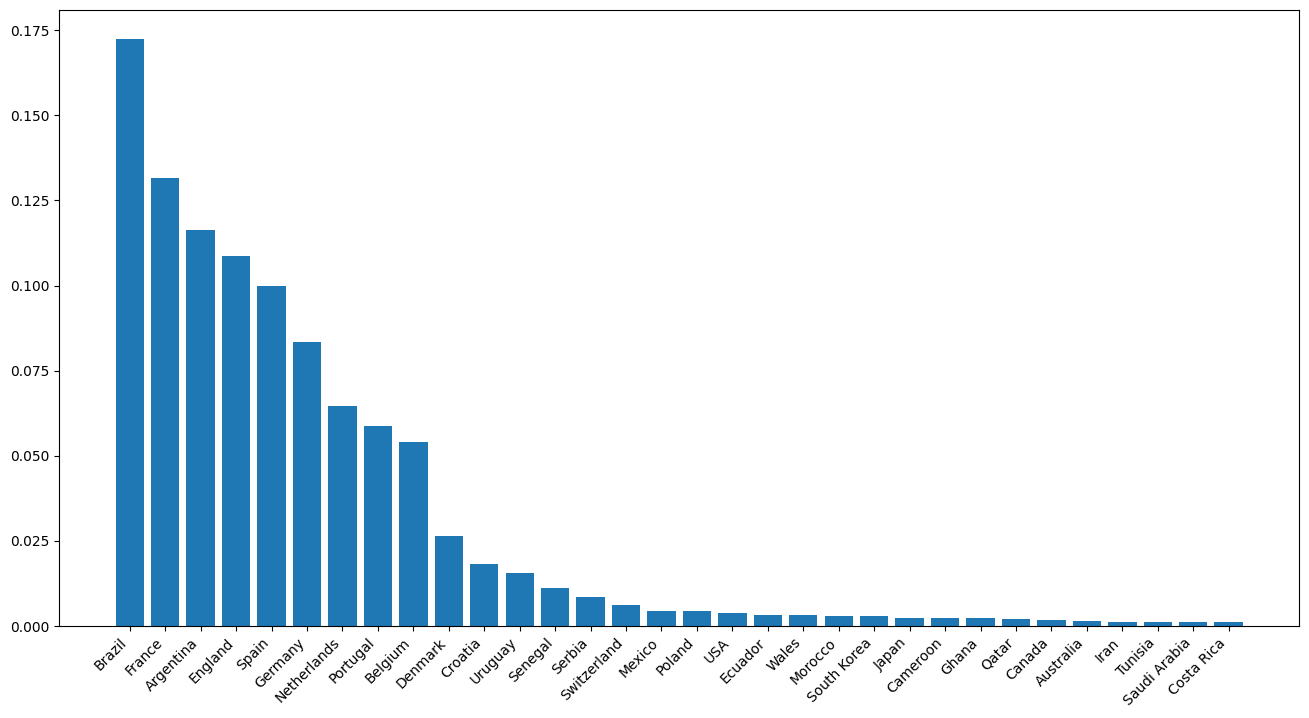

In [21]:
fig,ax = plt.subplots(figsize=(16,8))
ax.bar(range(32),prob)
ax.set_xticks(range(32), teams, rotation = 45, ha='right');

In [25]:
#rpoughly a 1.6% overround
sum(prob)

1.0160190592576974

In [26]:
log_odds = np.log(prob)

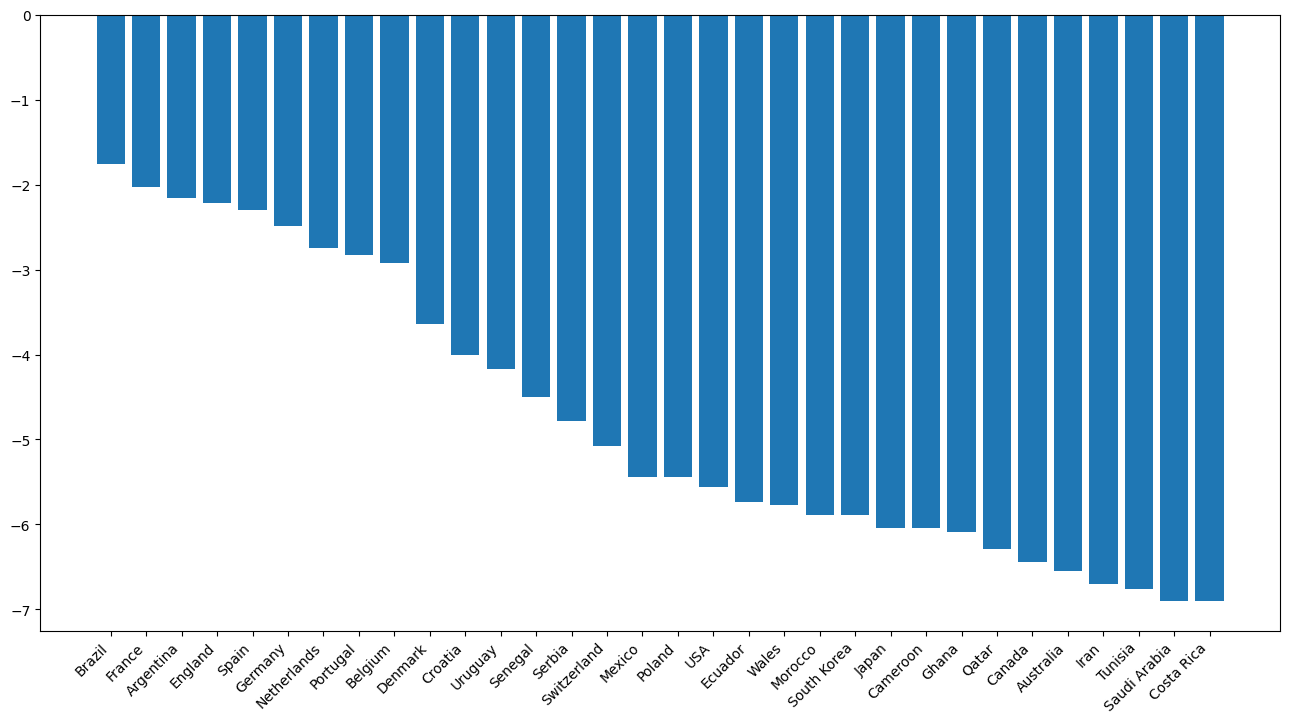

In [27]:
fig,ax = plt.subplots(figsize=(16,8))
ax.bar(range(32),log_odds)
ax.set_xticks(range(32), teams, rotation = 45, ha='right');

In [32]:
def logit(p):
    return np.log(p) - np.log(1 - p)

In [34]:
logit_odds = [logit(p) for p in prob]

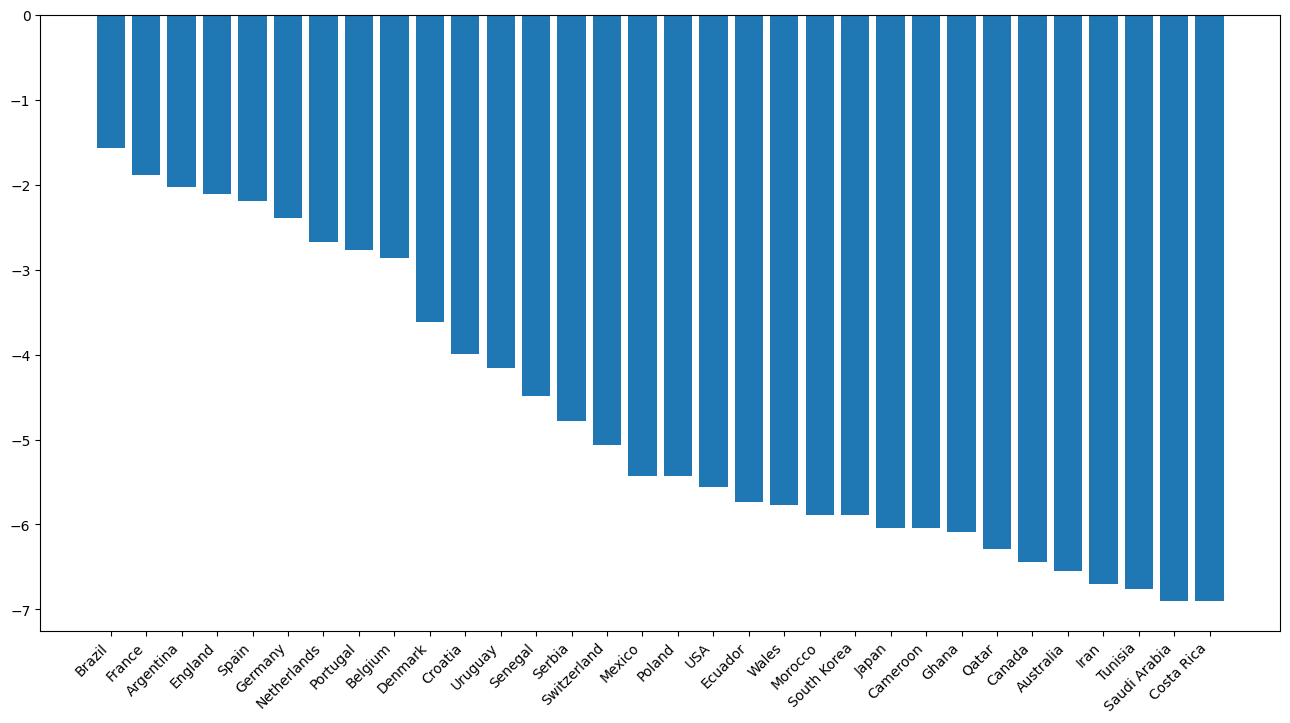

In [36]:
fig,ax = plt.subplots(figsize=(16,8))
ax.bar(range(32),logit_odds)
ax.set_xticks(range(32), teams, rotation = 45, ha='right');

In [ ]:
# Pairwise Comparison
# P(A beats B) = ability(A)/(ability(A)+ability(B))

In [28]:
def pairwise_comparison(A,B):
    probA = A/(A+B)
    return probA

In [29]:
list1=[]
for i in range(32):
    list2=[]
    for j in range(32):
        i_beats_j = pairwise_comparison(log_odds[i], log_odds[j])
        list2.append(i_beats_j)
    list1.append(list2)

In [31]:
list1[1]

[0.5356959706312313,
 0.5,
 0.4852133248511508,
 0.4775088986211526,
 0.4683151992817438,
 0.44939587342586784,
 0.4252785144247198,
 0.4171975709236831,
 0.41006499616132697,
 0.35796740573999186,
 0.3360375257494368,
 0.3269869622950257,
 0.3106864769788416,
 0.297572678463929,
 0.2855210885047534,
 0.27164297257507153,
 0.27164297257507153,
 0.2672544094168744,
 0.2612004174004662,
 0.2601367598661222,
 0.25626530161792543,
 0.25626530161792543,
 0.2513692310246015,
 0.2513692310246015,
 0.24992821912657526,
 0.24377609875280057,
 0.23934149450209818,
 0.23640216924260138,
 0.23244765922822902,
 0.23086279240928034,
 0.22696622018454862,
 0.22696622018454862]

In [ ]:
##### elo method

In [46]:
def pairwise_comparison_elo(A,B):
    probA = 1/((10**(-(A-B)/400))+1)
    return probA

In [51]:
list1=[]
for i in range(32):
    list2=[]
    for j in range(32):
        i_beats_j = pairwise_comparison_elo(elo[i], elo[j])
        list2.append(i_beats_j)
    list1.append(list2)

In [53]:
matrix_values = np.array(list1)

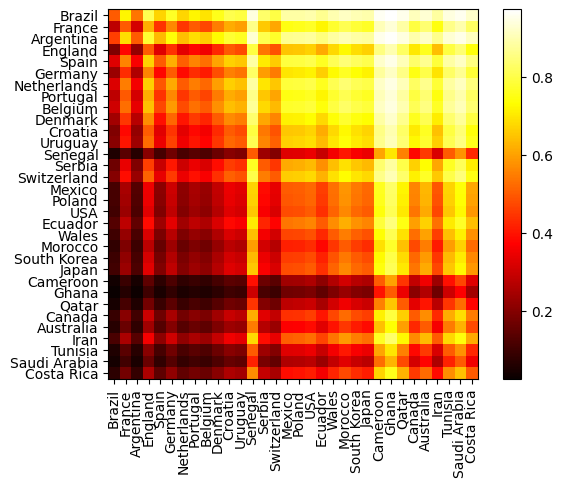

In [62]:
fig, ax = plt.subplots()
im = ax.imshow(matrix_values, cmap='hot')
ax.set_xticks(np.arange(len(teams)), labels=teams,rotation=90);
ax.set_yticks(np.arange(len(teams)), labels=teams);
ax.figure.colorbar(im, ax=ax)

In [63]:
zip_iterator = zip(teams, elo)
elo_dictionary = dict(zip_iterator)

In [64]:
elo_dictionary['France']

2005

In [ ]:
ability = argmin of x ( sum_i |prob of winning - simulated prob of winning|)

In [ ]:
#simulate tournament

In [239]:

def simulate_group_game(teamA,teamB, teamA_points, teamB_points, winA=0):
    teamA_win_prob = pairwise_comparison_elo(elo_dictionary[teamA], elo_dictionary[teamB])
    #teamA win
    if random.uniform(0, 1) <= teamA_win_prob:
        teamA_points += 3
        winA=1
    else:
        teamB_points += 3
        winA=-1
    return(teamA_points, teamB_points, winA)

In [240]:
win_array = np.zeros((4,4))

In [247]:
simulate_group_game('France','Germany', 0, 0,0)

(3, 0, 1)

In [220]:
win_array = np.zeros((4,4))

In [251]:
def simulate_group(group, pts):
    for i in range(4):
        for j in range(i+1,4):
            (x,y,winA) = simulate_group_game(group[i],group[j], pts[i], pts[j])
            win_array[i][j]=winA
            win_array[j][i]=-winA
            pts[i] = x
            pts[j] = y

In [293]:
unique = 0
twoway = 0
threeway = 0 
fourway = 0

for i in range(100000):
    groupA = ['Qatar','Ecuador','Senegal','Netherlands']
    groupApts =[0,0,0,0]
    win_array = np.zeros((4,4))

    simulate_group(groupA,groupApts)
    grp_sorted_points = sorted(groupApts, reverse = True)
    if grp_sorted_points[0] > grp_sorted_points[1]:
        unique +=1
    elif grp_sorted_points[1] > grp_sorted_points[2]:
        twoway +=1
    elif grp_sorted_points[0] == grp_sorted_points[3]:
        fourway+=1
    else:
        threeway+=1
        
print(unique)
print(twoway)
print(threeway)
print(fourway)

76294
15338
8368
0


In [323]:
groupA = ['Qatar','Ecuador','Senegal','Netherlands']
groupApts =[0,0,0,0]
win_array = np.zeros((4,4))
grp_elo = {k: v for k, v in elo_dictionary.items() if k in groupA}

simulate_group(groupA,groupApts)
print(groupA)
print(groupApts)
print(win_array)

['Qatar', 'Ecuador', 'Senegal', 'Netherlands']
[3, 3, 3, 9]
[[ 0.  1. -1. -1.]
 [-1.  0.  1. -1.]
 [ 1. -1.  0. -1.]
 [ 1.  1.  1.  0.]]


In [312]:
grp_elo

{'Netherlands': 2040, 'Senegal': 1687, 'Ecuador': 1840, 'Qatar': 1650}

In [313]:
sorted(groupApts, reverse = True)

[9, 6, 3, 0]

In [378]:
groupA = ['Qatar','Ecuador','Senegal','Netherlands']
groupApts =[0,0,0,0]
win_array = np.zeros((4,4))
grp_elo = {k: v for k, v in elo_dictionary.items() if k in groupA}

simulate_group(groupA,groupApts)

## who qualifies from group
grp_sorted_points = sorted(groupApts, reverse = True)
if grp_sorted_points[0] > grp_sorted_points[1]: #unique winner
    grp_winner_idx =np.argmax(groupApts)
    grp_winner = groupA[grp_winner_idx]
    del grp_elo[grp_winner]
    grp_runner_up = max(grp_elo, key=grp_elo.get)
    print('unique winner')
elif grp_sorted_points[1] > grp_sorted_points[2]:#two-way-tie (head to head)?
    idx1 = np.argmax(groupApts)
    groupApts_copy = groupApts.copy()
    groupApts_copy[idx1] = 0
    idx2 = np.argmax(groupApts_copy)
    if win_array[idx1, idx2] == 1:
        grp_winner = groupA[idx1]
        grp_runner_up = groupA[idx2]
    else:
        grp_winner = groupA[idx2]
        grp_runner_up = groupA[idx1]
    print('two-way tie')
else:
    grp_winner = max(grp_elo, key=grp_elo.get)
    del grp_elo[grp_winner]
    grp_runner_up = max(grp_elo, key=grp_elo.get)
    print('three-way tie!')
print(groupA)
print(groupApts)
print(win_array)
print(grp_winner)
print(grp_runner_up)

two-way tie
['Qatar', 'Ecuador', 'Senegal', 'Netherlands']
[3, 6, 3, 6]
[[ 0. -1.  1. -1.]
 [ 1.  0.  1. -1.]
 [-1. -1.  0.  1.]
 [ 1.  1. -1.  0.]]
Netherlands
Ecuador


In [384]:
#simulate groupA 100 times
qat=0
ecu=0
sen=0
ned=0
for i in range(100000):
    groupA = ['Qatar','Ecuador','Senegal','Netherlands']
    groupApts =[0,0,0,0]
    win_array = np.zeros((4,4))
    grp_elo = {k: v for k, v in elo_dictionary.items() if k in groupA}

    simulate_group(groupA,groupApts)

    ## who qualifies from group
    grp_sorted_points = sorted(groupApts, reverse = True)
    if grp_sorted_points[0] > grp_sorted_points[1]: #unique winner
        grp_winner_idx =np.argmax(groupApts)
        grp_winner = groupA[grp_winner_idx]
        del grp_elo[grp_winner]
        grp_runner_up = max(grp_elo, key=grp_elo.get)
    elif grp_sorted_points[1] > grp_sorted_points[2]:#two-way-tie (head to head)?
        idx1 = np.argmax(groupApts)
        groupApts_copy = groupApts.copy()
        groupApts_copy[idx1] = 0
        idx2 = np.argmax(groupApts_copy)
        if win_array[idx1, idx2] == 1:
            grp_winner = groupA[idx1]
            grp_runner_up = groupA[idx2]
        else:
            grp_winner = groupA[idx2]
            grp_runner_up = groupA[idx1]
    else:
        grp_winner = max(grp_elo, key=grp_elo.get)
        del grp_elo[grp_winner]
        grp_runner_up = max(grp_elo, key=grp_elo.get)
    if (grp_winner == 'Qatar')|(grp_runner_up == 'Qatar'):
        qat+=1
    if (grp_winner == 'Ecuador')|(grp_runner_up == 'Ecuador'):
        ecu+=1
    if (grp_winner == 'Senegal')|(grp_runner_up == 'Senegal'):
        sen+=1
    if (grp_winner == 'Netherlands')|(grp_runner_up == 'Netherlands'):
        ned+=1

In [382]:
print(qat)
print(ecu)
print(sen)
print(ned)

2850
17072
4107
75971


In [386]:
print(qat/1000)
print(ecu/1000)
print(sen/1000)
print(ned/1000)

4.807
91.009
6.257
97.927


In [317]:
####### Code up the groups
groupA = ['Qatar','Ecuador','Senegal','Netherlands']
groupB = ['England','Iran','USA','Wales']
groupC = ['Argentina','Saudi Arabia','Mexico','Poland']
groupD = ['France','Australia','Denmark','Tunisia']
groupE = ['Spain','Costa Rica','Germany','Japan']
groupF = ['Belgium','Canada','Morocco','Croatia']
groupG = ['Brazil','Serbia','Switzerland','Cameroon']
groupH = ['Portugal','Ghana','Uruguay','South Korea']

In [506]:
grps = [groupA,groupB,groupC,groupD,groupE,groupF,groupG,groupH]
group_winners = []
group_runners_up = []
for i, grp in enumerate(grps):
    group1 = grp
    group1pts =[0,0,0,0]
    win_array = np.zeros((4,4))
    grp_elo = {k: v for k, v in elo_dictionary.items() if k in group1}

    simulate_group(group1,group1pts)

    ## who qualifies from group
    grp_sorted_points = sorted(group1pts, reverse = True)
    if grp_sorted_points[0] > grp_sorted_points[1]: #unique winner
        grp_winner_idx =np.argmax(group1pts)
        grp_winner = group1[grp_winner_idx]
        del grp_elo[grp_winner]
        grp_runner_up = max(grp_elo, key=grp_elo.get)
    elif grp_sorted_points[1] > grp_sorted_points[2]:#two-way-tie (head to head)?
        idx1 = np.argmax(group1pts)
        group1pts_copy = group1pts.copy()
        group1pts_copy[idx1] = 0
        idx2 = np.argmax(group1pts_copy)
        if win_array[idx1, idx2] == 1:
            grp_winner = group1[idx1]
            grp_runner_up = group1[idx2]
        else:
            grp_winner = group1[idx2]
            grp_runner_up = group1[idx1]
    else:
        grp_winner = max(grp_elo, key=grp_elo.get)
        del grp_elo[grp_winner]
        grp_runner_up = max(grp_elo, key=grp_elo.get)
    group_winners.append(grp_winner)
    group_runners_up.append(grp_runner_up)

In [507]:
group_winners

['Ecuador',
 'England',
 'Argentina',
 'France',
 'Germany',
 'Canada',
 'Serbia',
 'Uruguay']

In [508]:
group_runners_up

['Netherlands',
 'Iran',
 'Mexico',
 'Denmark',
 'Spain',
 'Belgium',
 'Brazil',
 'Portugal']

In [450]:
####### simulate knockouts
game1_winner = group_winners[0] if simulate_group_game(group_winners[0], group_runners_up[1],0,0)[2]==1 else group_runners_up[1]
game2_winner = group_winners[1] if simulate_group_game(group_winners[1], group_runners_up[0],0,0)[2]==1 else group_runners_up[0]
game3_winner = group_winners[2] if simulate_group_game(group_winners[2], group_runners_up[3],0,0)[2]==1 else group_runners_up[3]
game4_winner = group_winners[3] if simulate_group_game(group_winners[3], group_runners_up[2],0,0)[2]==1 else group_runners_up[2]
game5_winner = group_winners[4] if simulate_group_game(group_winners[4], group_runners_up[5],0,0)[2]==1 else group_runners_up[5]
game6_winner = group_winners[5] if simulate_group_game(group_winners[5], group_runners_up[4],0,0)[2]==1 else group_runners_up[4]
game7_winner = group_winners[6] if simulate_group_game(group_winners[6], group_runners_up[7],0,0)[2]==1 else group_runners_up[7]
game8_winner = group_winners[7] if simulate_group_game(group_winners[7], group_runners_up[6],0,0)[2]==1 else group_runners_up[6]

In [451]:
######## sim quarter-finals
q1_winner = game1_winner if simulate_group_game(game1_winner, game3_winner,0,0)[2]==1 else game3_winner
q2_winner = game2_winner if simulate_group_game(game2_winner, game4_winner,0,0)[2]==1 else game4_winner
q3_winner = game5_winner if simulate_group_game(game5_winner, game7_winner,0,0)[2]==1 else game7_winner
q4_winner = game6_winner if simulate_group_game(game6_winner, game8_winner,0,0)[2]==1 else game8_winner


In [452]:
###### sim semi-finals
s1_winner = q1_winner if simulate_group_game(q1_winner, q3_winner,0,0)[2]==1 else q3_winner
s2_winner = q2_winner if simulate_group_game(q2_winner, q4_winner,0,0)[2]==1 else q4_winner


In [453]:
###### sim final
winner = s1_winner if simulate_group_game(s1_winner, s2_winner,0,0)[2]==1 else s2_winner

In [454]:
winner

'Brazil'

In [464]:
final_winners = []
for runs in range(1000000):
    grps = [groupA,groupB,groupC,groupD,groupE,groupF,groupG,groupH]
    group_winners = []
    group_runners_up = []
    for i, grp in enumerate(grps):
        group1 = grp
        group1pts =[0,0,0,0]
        win_array = np.zeros((4,4))
        grp_elo = {k: v for k, v in elo_dictionary.items() if k in group1}

        simulate_group(group1,group1pts)

        ## who qualifies from group
        grp_sorted_points = sorted(group1pts, reverse = True)
        if grp_sorted_points[0] > grp_sorted_points[1]: #unique winner
            grp_winner_idx =np.argmax(group1pts)
            grp_winner = group1[grp_winner_idx]
            del grp_elo[grp_winner]
            grp_runner_up = max(grp_elo, key=grp_elo.get)
        elif grp_sorted_points[1] > grp_sorted_points[2]:#two-way-tie (head to head)?
            idx1 = np.argmax(group1pts)
            group1pts_copy = group1pts.copy()
            group1pts_copy[idx1] = 0
            idx2 = np.argmax(group1pts_copy)
            if win_array[idx1, idx2] == 1:
                grp_winner = group1[idx1]
                grp_runner_up = group1[idx2]
            else:
                grp_winner = group1[idx2]
                grp_runner_up = group1[idx1]
        else:
            grp_winner = max(grp_elo, key=grp_elo.get)
            del grp_elo[grp_winner]
            grp_runner_up = max(grp_elo, key=grp_elo.get)
        group_winners.append(grp_winner)
        group_runners_up.append(grp_runner_up)
    ####### simulate knockouts
    game1_winner = group_winners[0] if simulate_group_game(group_winners[0], group_runners_up[1],0,0)[2]==1 else group_runners_up[1]
    game2_winner = group_winners[1] if simulate_group_game(group_winners[1], group_runners_up[0],0,0)[2]==1 else group_runners_up[0]
    game3_winner = group_winners[2] if simulate_group_game(group_winners[2], group_runners_up[3],0,0)[2]==1 else group_runners_up[3]
    game4_winner = group_winners[3] if simulate_group_game(group_winners[3], group_runners_up[2],0,0)[2]==1 else group_runners_up[2]
    game5_winner = group_winners[4] if simulate_group_game(group_winners[4], group_runners_up[5],0,0)[2]==1 else group_runners_up[5]
    game6_winner = group_winners[5] if simulate_group_game(group_winners[5], group_runners_up[4],0,0)[2]==1 else group_runners_up[4]
    game7_winner = group_winners[6] if simulate_group_game(group_winners[6], group_runners_up[7],0,0)[2]==1 else group_runners_up[7]
    game8_winner = group_winners[7] if simulate_group_game(group_winners[7], group_runners_up[6],0,0)[2]==1 else group_runners_up[6]
    ######## sim quarter-finals
    q1_winner = game1_winner if simulate_group_game(game1_winner, game3_winner,0,0)[2]==1 else game3_winner
    q2_winner = game2_winner if simulate_group_game(game2_winner, game4_winner,0,0)[2]==1 else game4_winner
    q3_winner = game5_winner if simulate_group_game(game5_winner, game7_winner,0,0)[2]==1 else game7_winner
    q4_winner = game6_winner if simulate_group_game(game6_winner, game8_winner,0,0)[2]==1 else game8_winner
    ###### sim semi-finals
    s1_winner = q1_winner if simulate_group_game(q1_winner, q3_winner,0,0)[2]==1 else q3_winner
    s2_winner = q2_winner if simulate_group_game(q2_winner, q4_winner,0,0)[2]==1 else q4_winner
    ###### sim final
    winner = s1_winner if simulate_group_game(s1_winner, s2_winner,0,0)[2]==1 else s2_winner
    final_winners.append(winner)
    
    

In [465]:
final_winners[0:5]

['Uruguay', 'Netherlands', 'Argentina', 'Portugal', 'Argentina']

In [339]:
from collections import Counter

In [486]:
Counter(final_winners).most_common()

[('Brazil', 268389),
 ('Argentina', 216471),
 ('Netherlands', 88236),
 ('Spain', 79589),
 ('France', 67147),
 ('Belgium', 65330),
 ('Portugal', 51450),
 ('Denmark', 38979),
 ('Germany', 30599),
 ('Switzerland', 21615),
 ('England', 19887),
 ('Uruguay', 17787),
 ('Croatia', 14515),
 ('Ecuador', 8054),
 ('Mexico', 4587),
 ('Iran', 2694),
 ('Serbia', 1436),
 ('USA', 907),
 ('Wales', 754),
 ('Poland', 434),
 ('Japan', 334),
 ('South Korea', 243),
 ('Canada', 175),
 ('Morocco', 136),
 ('Australia', 80),
 ('Costa Rica', 78),
 ('Senegal', 37),
 ('Tunisia', 32),
 ('Qatar', 16),
 ('Saudi Arabia', 8),
 ('Cameroon', 1)]

In [490]:
wins = [268389, 67147, 216471, 19887, 79589, 30599, 88236, 51450, 65330, 38979, 14515, 17787, 37, 1436, 21615,
       4587, 434, 907, 8054, 754, 136, 243, 334, 1 , 0, 16, 175, 80, 2694, 32, 8, 78]

In [501]:
268389/10000

26.8389

In [487]:
teams

['Brazil',
 'France',
 'Argentina',
 'England',
 'Spain',
 'Germany',
 'Netherlands',
 'Portugal',
 'Belgium',
 'Denmark',
 'Croatia',
 'Uruguay',
 'Senegal',
 'Serbia',
 'Switzerland',
 'Mexico',
 'Poland',
 'USA',
 'Ecuador',
 'Wales',
 'Morocco',
 'South Korea',
 'Japan',
 'Cameroon',
 'Ghana',
 'Qatar',
 'Canada',
 'Australia',
 'Iran',
 'Tunisia',
 'Saudi Arabia',
 'Costa Rica']

In [472]:
sorted_elo = {k: v for k, v in sorted(elo_dictionary.items(), key=lambda item: item[1], reverse=True)}

In [473]:
sorted_elo

{'Brazil': 2169,
 'Argentina': 2141,
 'Spain': 2045,
 'Netherlands': 2040,
 'Belgium': 2025,
 'France': 2005,
 'Portugal': 2004,
 'Denmark': 1971,
 'Germany': 1960,
 'Uruguay': 1936,
 'Switzerland': 1929,
 'Croatia': 1922,
 'England': 1920,
 'Serbia': 1893,
 'Ecuador': 1840,
 'Iran': 1817,
 'Mexico': 1813,
 'Poland': 1809,
 'USA': 1798,
 'Japan': 1798,
 'Wales': 1790,
 'South Korea': 1783,
 'Canada': 1770,
 'Morocco': 1754,
 'Costa Rica': 1737,
 'Australia': 1719,
 'Senegal': 1687,
 'Tunisia': 1687,
 'Qatar': 1650,
 'Saudi Arabia': 1632,
 'Cameroon': 1613,
 'Ghana': 1541}

Text(0, 0.5, 'Simulated Prob. of Winning WC')

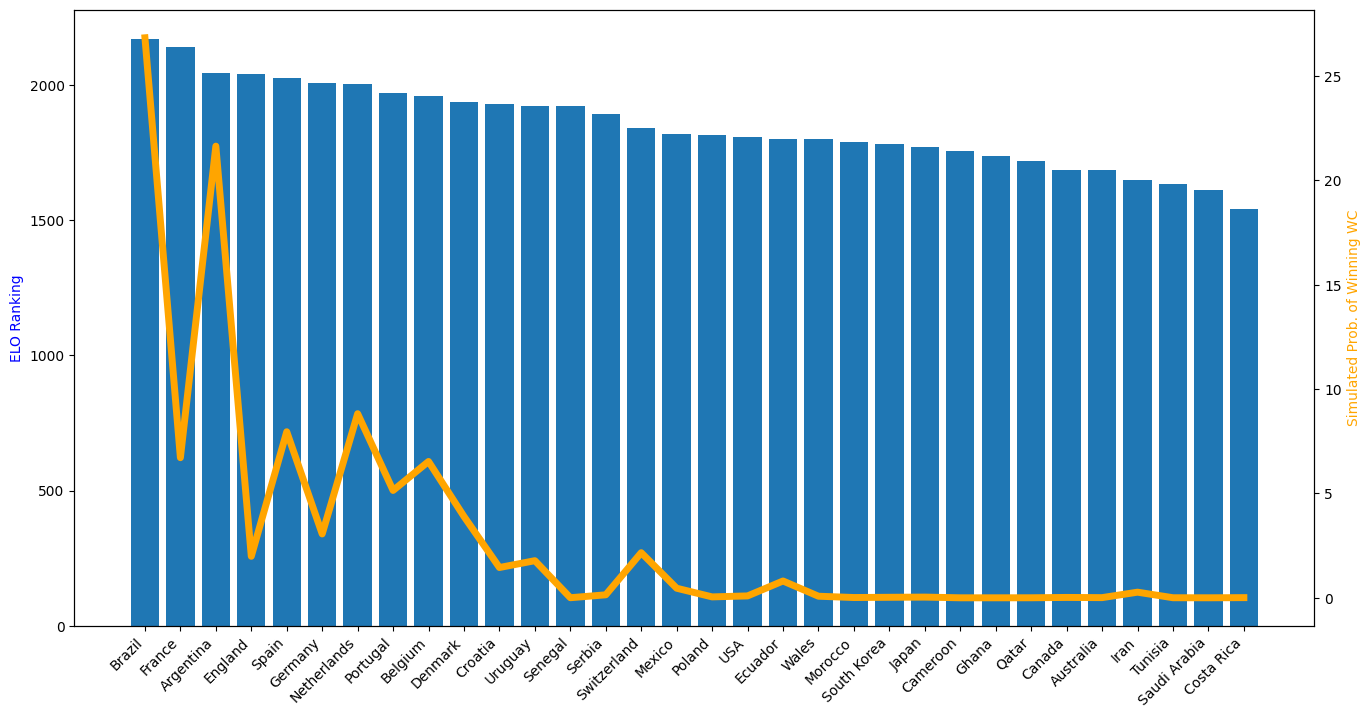

In [505]:
fig,ax = plt.subplots(figsize=(16,8))
ax.bar(range(32), sorted_elo.values())
ax.set_xticks(range(32), teams, rotation = 45, ha='right');
ax.set_ylabel('ELO Ranking', color='blue')
ax2 = ax.twinx()
ax2.plot(range(32), [x/10000 for x in wins], color='orange',lw=5)
ax2.set_ylabel('Simulated Prob. of Winning WC', color='orange')

In [478]:
sorted_elo.items()

dict_items([('Brazil', 2169), ('Argentina', 2141), ('Spain', 2045), ('Netherlands', 2040), ('Belgium', 2025), ('France', 2005), ('Portugal', 2004), ('Denmark', 1971), ('Germany', 1960), ('Uruguay', 1936), ('Switzerland', 1929), ('Croatia', 1922), ('England', 1920), ('Serbia', 1893), ('Ecuador', 1840), ('Iran', 1817), ('Mexico', 1813), ('Poland', 1809), ('USA', 1798), ('Japan', 1798), ('Wales', 1790), ('South Korea', 1783), ('Canada', 1770), ('Morocco', 1754), ('Costa Rica', 1737), ('Australia', 1719), ('Senegal', 1687), ('Tunisia', 1687), ('Qatar', 1650), ('Saudi Arabia', 1632), ('Cameroon', 1613), ('Ghana', 1541)])

In [480]:
sorted_elo.values()

dict_values([2169, 2141, 2045, 2040, 2025, 2005, 2004, 1971, 1960, 1936, 1929, 1922, 1920, 1893, 1840, 1817, 1813, 1809, 1798, 1798, 1790, 1783, 1770, 1754, 1737, 1719, 1687, 1687, 1650, 1632, 1613, 1541])

In [509]:
######
# using bookie prices

In [510]:
sum(prob)

1.0160190592576974

In [511]:
scaled_prob = [p/sum(prob) for p in prob]

Text(0, 0.5, 'Simulated Prob. of Winning WC')

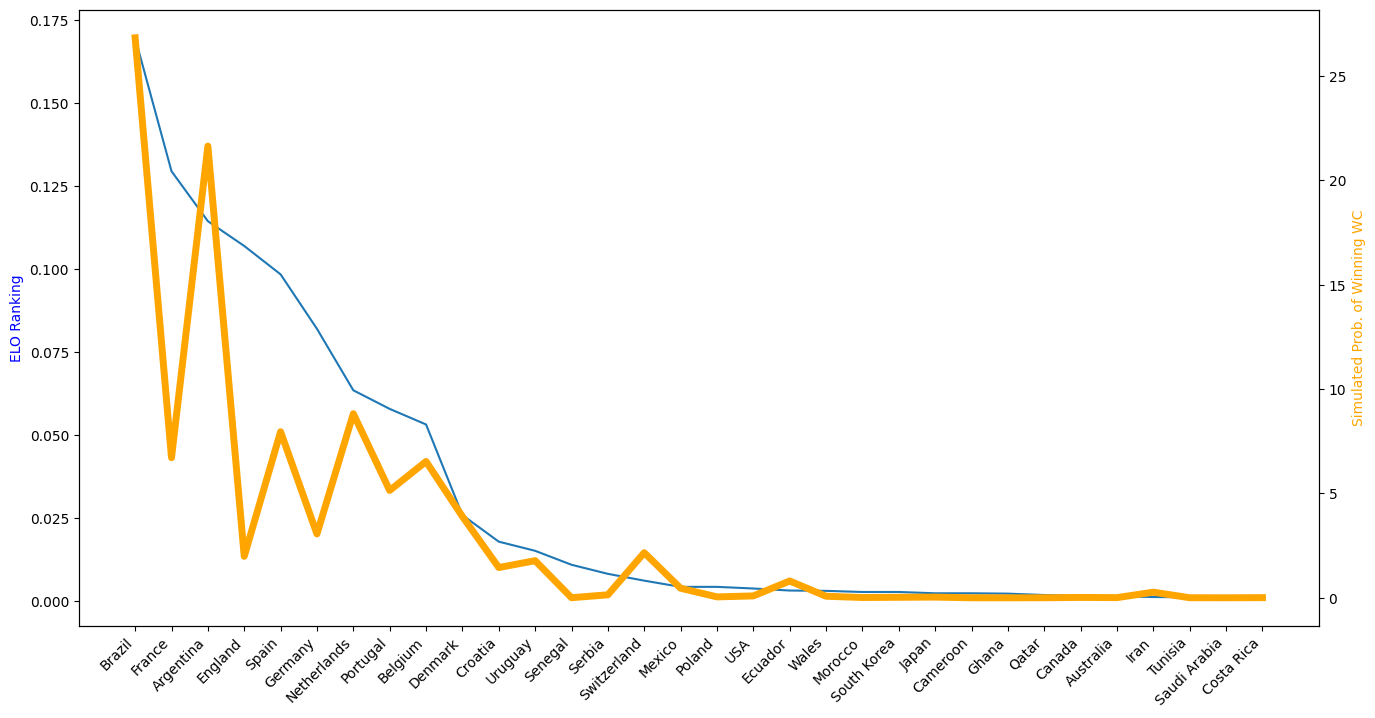

In [515]:
fig,ax = plt.subplots(figsize=(16,8))
ax.plot(range(32), scaled_prob)
ax.set_xticks(range(32), teams, rotation = 45, ha='right');
ax.set_ylabel('ELO Ranking', color='blue')
ax2 = ax.twinx()
ax2.plot(range(32), [x/10000 for x in wins], color='orange',lw=5)
ax2.set_ylabel('Simulated Prob. of Winning WC', color='orange')

In [519]:
df = pd.DataFrame(list(zip(teams, [x/10000 for x in wins], [x*100 for x in scaled_prob])), columns = ['teams', 'elo', 'bkie'])

In [520]:
df.head()

,teams,elo,bkie
0,Brazil,26.8389,16.969543
1,France,6.7147,12.950441
2,Argentina,21.6471,11.444576
3,England,1.9887,10.698190
4,Spain,7.9589,9.842335


In [556]:
from matplotlib import rcParams
rcParams['font.family'] = 'monospace'
plt.rcParams["font.weight"] = "light"
plt.style.use('fivethirtyeight')
#plt.style.use('default')

Text(0.1, 0.94, 'FIFA 2022 Qatar World Cup\nComparing Bookmaker and ELO Models')

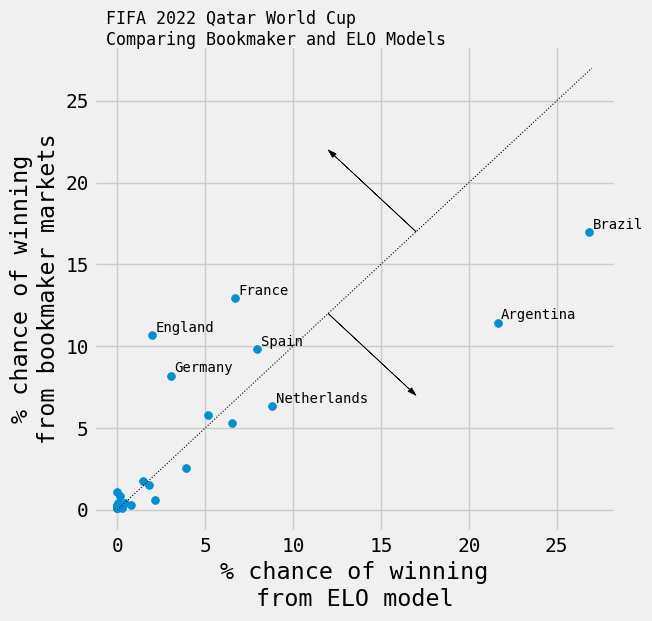

In [564]:
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(df['elo'], df['bkie'],s = 32)
ax.set_xlabel('% chance of winning\nfrom ELO model')
ax.set_ylabel('% chance of winning\nfrom bookmaker markets')
ax.plot([0,27],[0,27],lw=0.8, ls=':', color='black')
ax.arrow(17, 17, -5, 5, head_width=0.3, head_length=0.5, fc='k', 
         ec='k', length_includes_head=True)
ax.arrow(12, 12, 5, -5, head_width=0.3, head_length=0.5, fc='k', 
         ec='k', length_includes_head=True)
for i, label in enumerate(teams[0:7]):
    plt.annotate(label, (df['elo'][i]+0.2, df['bkie'][i]+0.2), size=10)
fig.suptitle('FIFA 2022 Qatar World Cup\nComparing Bookmaker and ELO Models', x=0.1, y=0.94, ha='left',size=12)


In [1]:
##########################
##### Team Strengths #####
##########################

In [3]:
results = pd.read_csv('international_results.csv')

In [375]:
import datetime as dt
from datetime import datetime

In [376]:
raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')

NameError: name 'raw_data' is not defined

In [389]:
recent_results = results[results['date']>='2018-08-01']
recent_results['wc_ko'] = datetime.strptime('2022-11-20', '%Y-%m-%d')
recent_results['dateimte_date'] =  pd.to_datetime(results['date'], format='%Y-%m-%d')
recent_results['date_to_wc'] = (recent_results['wc_ko'] - recent_results['dateimte_date']).dt.days
recent_results['obs_weights'] = 1*np.exp(-recent_results['date_to_wc']/365)
#recent_results['days_to_wc'] = df[["col1", "col2", "col3"]].apply(pd.to_datetime)
recent_results.head()

/opt/conda/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,wc_ko,dateimte_date,date_to_wc,obs_weights
40299,2018-08-04,Belize,Barbados,1.0,0.0,Friendly,San Pedro,Belize,False,2022-11-20,2018-08-04,1569,0.013587
40300,2018-08-04,Palestine,Iraq,0.0,3.0,Friendly,Al-Ram,Palestine,False,2022-11-20,2018-08-04,1569,0.013587
40301,2018-08-15,Guatemala,Cuba,3.0,0.0,Friendly,Guatemala City,Guatemala,False,2022-11-20,2018-08-15,1558,0.014003
40302,2018-08-18,Andorra,United Arab Emirates,0.0,0.0,Friendly,Grödig,Austria,True,2022-11-20,2018-08-18,1555,0.014118
40303,2018-08-18,Grenada,Jamaica,1.0,5.0,Friendly,St. George's,Grenada,False,2022-11-20,2018-08-18,1555,0.014118


In [391]:
recent_results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,wc_ko,dateimte_date,date_to_wc,obs_weights
44055,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False,2022-11-20,2022-09-27,54,0.862478
44056,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False,2022-11-20,2022-09-27,54,0.862478
44057,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False,2022-11-20,2022-09-27,54,0.862478
44058,2022-09-27,Greece,Northern Ireland,3.0,1.0,UEFA Nations League,Athens,Greece,False,2022-11-20,2022-09-27,54,0.862478
44059,2022-09-30,Fiji,Solomon Islands,NaN,NaN,MSG Prime Minister's Cup,Luganville,Vanuatu,True,2022-11-20,2022-09-30,51,0.869596


In [392]:
# fit poisson models to each
from scipy.stats import poisson,skellam

In [393]:
recent_results[['home_score','away_score']].mean()

home_score    1.612500
away_score    1.080319
dtype: float64

array([[<AxesSubplot:title={'center':'home_score'}>,
        <AxesSubplot:title={'center':'away_score'}>]], dtype=object)

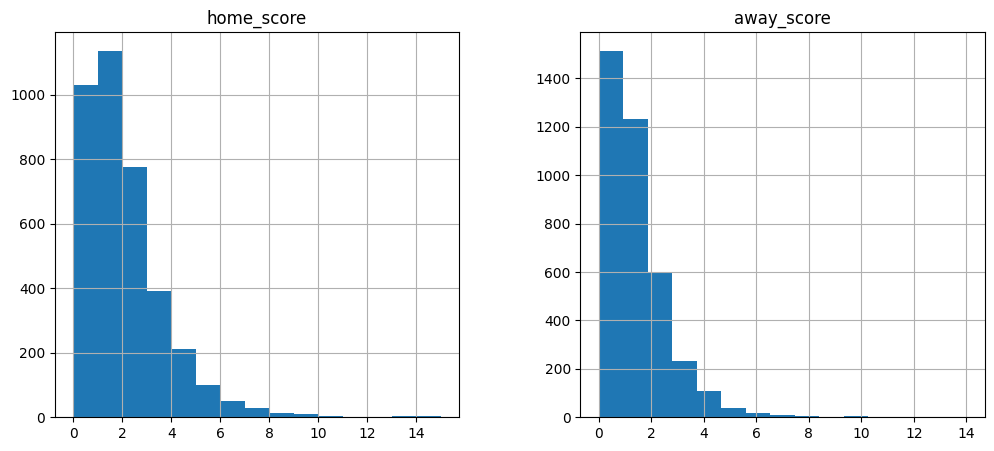

In [394]:
recent_results[['home_score','away_score']].hist(figsize=(12,5), bins=15)

In [395]:
goal_model_data = pd.concat([recent_results[['home_team','away_team','home_score', 'obs_weights']].assign(home=1).rename(
            columns={'home_team':'team', 'away_team':'opponent','home_score':'goals'}),
           recent_results[['away_team','home_team','away_score', 'obs_weights']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent','away_score':'goals'})])

In [396]:
goal_model_data.dropna(inplace=True)

In [397]:
goal_model_data.head()

,team,opponent,goals,obs_weights,home
40299,Belize,Barbados,1.0,0.013587,1
40300,Palestine,Iraq,0.0,0.013587,1
40301,Guatemala,Cuba,3.0,0.014003,1
40302,Andorra,United Arab Emirates,0.0,0.014118,1
40303,Grenada,Jamaica,1.0,0.014118,1


In [398]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [399]:
poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, var_weights=np.asarray(goal_model_data["obs_weights"]),
                        family=sm.families.Poisson()).fit(method="lbfgs")

/opt/conda/envs/jupyterhub/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [400]:
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                 7520
Model:                            GLM   Df Residuals:                     7020
Model Family:                 Poisson   Df Model:                          499
Link Function:                    log   Scale:                          1.0000
Method:                         lbfgs   Log-Likelihood:                -2174.8
Date:                Thu, 13 Oct 2022   Deviance:                       1593.5
Time:                        11:35:22   Pearson chi2:                 1.44e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.9646      4.312     -0.224      0.823      -9.416       7.486
team[T.Afghanistan]                              0.0483        nan        nan        nan         nan         nan
team[T.Albania]                                  0.7050        nan        nan        nan         nan         nan
team[T.Alderney]                                 0.5587        nan        nan        nan         nan         nan
team[T.Algeria]                                  1.4301        nan        nan        nan         nan         nan
team[T.American Samoa]                          -1.2025        nan        nan        nan         nan         nan
team[T.Andorra]                                  0.1980        nan        nan        nan         nan         nan
team[T.Angola]                                   0.7332        nan        nan        nan         nan         nan
team[T.Anguilla]                                -1.4131        nan        nan        nan         nan         nan
team[T.Antigua and Barbuda]                     -0.2300        nan        nan        nan         nan         nan
team[T.Argentina]                                1.9071        nan        nan        nan         nan         nan
team[T.Armenia]                                  0.8034        nan        nan        nan         nan         nan
team[T.Artsakh]                                  0.1647      3.213      0.051      0.959      -6.133       6.463
team[T.Aruba]                                    0.0473        nan        nan        nan         nan         nan
team[T.Australia]                                1.3120        nan        nan        nan         nan         nan
team[T.Austria]                                  1.4858        nan        nan        nan         nan         nan
team[T.Aymara]                                  -0.3587        nan        nan        nan         nan         nan
team[T.Azerbaijan]                               0.7096        nan        nan        nan         nan         nan
team[T.Bahamas]                                 -1.1903        nan        nan        nan         nan         nan
team[T.Bahrain]                                  0.7490        nan        nan        nan         nan         nan
team[T.Bangladesh]                              -0.6375        nan        nan        nan         nan         nan
team[T.Barawa]                                  -1.2199   1.22e+14     -1e-14      1.000   -2.39e+14    2.39e+14
team[T.Barbados]                                -0.9976        nan        nan        nan         nan         nan
team[T.Basque Country]                           1.6690        nan        nan        nan         nan         nan
team[T.Belarus]                 

In [32]:
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                 7520
Model:                            GLM   Df Residuals:                     7020
Model Family:                 Poisson   Df Model:                          499
Link Function:                    log   Scale:                          1.0000
Method:                         lbfgs   Log-Likelihood:                -9959.5
Date:                Wed, 12 Oct 2022   Deviance:                       7605.4
Time:                        16:54:59   Pearson chi2:                 6.88e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.9840      0.765     -1.287      0.198      -2.483       0.515
team[T.Afghanistan]                              0.0183   1.71e+06   1.07e-08      1.000   -3.34e+06    3.34e+06
team[T.Albania]                                  0.8427   1.71e+06   4.94e-07      1.000   -3.34e+06    3.34e+06
team[T.Alderney]                                 0.5697        nan        nan        nan         nan         nan
team[T.Algeria]                                  1.5701   1.71e+06    9.2e-07      1.000   -3.34e+06    3.34e+06
team[T.American Samoa]                          -0.9423   1.71e+06  -5.52e-07      1.000   -3.34e+06    3.34e+06
team[T.Andorra]                                 -0.0606   1.71e+06  -3.55e-08      1.000   -3.34e+06    3.34e+06
team[T.Angola]                                   0.9814   1.71e+06   5.75e-07      1.000   -3.34e+06    3.34e+06
team[T.Anguilla]                                -1.5934   1.71e+06  -9.34e-07      1.000   -3.34e+06    3.34e+06
team[T.Antigua and Barbuda]                      0.1672   1.71e+06    9.8e-08      1.000   -3.34e+06    3.34e+06
team[T.Argentina]                                1.8095   1.71e+06   1.06e-06      1.000   -3.34e+06    3.34e+06
team[T.Armenia]                                  1.0269   1.71e+06   6.02e-07      1.000   -3.34e+06    3.34e+06
team[T.Artsakh]                                  0.1731      0.568      0.305      0.761      -0.940       1.287
team[T.Aruba]                                   -0.3825   1.71e+06  -2.24e-07      1.000   -3.34e+06    3.34e+06
team[T.Australia]                                1.2439   1.71e+06   7.29e-07      1.000   -3.34e+06    3.34e+06
team[T.Austria]                                  1.4465   1.71e+06   8.48e-07      1.000   -3.34e+06    3.34e+06
team[T.Aymara]                                  -0.5310   3.65e+07  -1.45e-08      1.000   -7.16e+07    7.16e+07
team[T.Azerbaijan]                               0.6155   1.71e+06   3.61e-07      1.000   -3.34e+06    3.34e+06
team[T.Bahamas]                                 -0.9625   1.71e+06  -5.64e-07      1.000   -3.34e+06    3.34e+06
team[T.Bahrain]                                  0.8413   1.71e+06   4.93e-07      1.000   -3.34e+06    3.34e+06
team[T.Bangladesh]                              -0.8130   1.71e+06  -4.76e-07      1.000   -3.34e+06    3.34e+06
team[T.Barawa]                                  -1.7877        nan        nan        nan         nan         nan
team[T.Barbados]                                -0.5250   1.71e+06  -3.08e-07      1.000   -3.34e+06    3.34e+06
team[T.Basque Country]                           1.6403   1.71e+06   9.61e-07      1.000   -3.34e+06    3.34e+06
team[T.Belarus]                 

In [66]:
poisson_model.predict(pd.DataFrame(data={'team': 'Yorkshire', 'opponent': 'Argentina',
                                       'home':0},index=[1]))

1    0.316095
dtype: float64

In [45]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))
simulate_match(poisson_model, 'Yorkshire', 'Argentina', max_goals=6)


array([[1.30687843e-02, 5.13045523e-02, 1.00703976e-01, 1.31778960e-01,
        1.29332239e-01, 1.01544757e-01, 6.64395934e-02],
       [5.38167560e-03, 2.11270192e-02, 4.14695139e-02, 5.42660738e-02,
        5.32585235e-02, 4.18157442e-02, 2.73595715e-02],
       [1.10807676e-03, 4.35001303e-03, 8.53849393e-03, 1.11732813e-02,
        1.09658286e-02, 8.60978209e-03, 5.63328367e-03],
       [1.52100596e-04, 5.97106266e-04, 1.17203976e-03, 1.53370489e-03,
        1.50522881e-03, 1.18182516e-03, 7.73254920e-04],
       [1.56586115e-05, 6.14715215e-05, 1.20660377e-04, 1.57893458e-04,
        1.54961873e-04, 1.21667775e-04, 7.96058578e-05],
       [1.28963132e-06, 5.06274768e-06, 9.93749676e-06, 1.30039849e-05,
        1.27625418e-05, 1.00204652e-05, 6.55627781e-06],
       [8.85108776e-08, 3.47470036e-07, 6.82037219e-07, 8.92498577e-07,
        8.75927685e-07, 6.87731570e-07, 4.49975038e-07]])

In [57]:
game_result = simulate_match(poisson_model, 'Yorkshire', 'Argentina', max_goals=10)

In [58]:
game_result

array([[1.30687843e-02, 5.13045523e-02, 1.00703976e-01, 1.31778960e-01,
        1.29332239e-01, 1.01544757e-01, 6.64395934e-02, 3.72605823e-02,
        1.82843852e-02, 7.97551187e-03, 3.13097268e-03],
       [5.38167560e-03, 2.11270192e-02, 4.14695139e-02, 5.42660738e-02,
        5.32585235e-02, 4.18157442e-02, 2.73595715e-02, 1.53437659e-02,
        7.52944021e-03, 3.28428541e-03, 1.28932262e-03],
       [1.10807676e-03, 4.35001303e-03, 8.53849393e-03, 1.11732813e-02,
        1.09658286e-02, 8.60978209e-03, 5.63328367e-03, 3.15925218e-03,
        1.55029740e-03, 6.76228112e-04, 2.65469073e-04],
       [1.52100596e-04, 5.97106266e-04, 1.17203976e-03, 1.53370489e-03,
        1.50522881e-03, 1.18182516e-03, 7.73254920e-04, 4.33656005e-04,
        2.12802188e-04, 9.28227203e-05, 3.64397177e-05],
       [1.56586115e-05, 6.14715215e-05, 1.20660377e-04, 1.57893458e-04,
        1.54961873e-04, 1.21667775e-04, 7.96058578e-05, 4.46444728e-05,
        2.19077826e-05, 9.55601067e-06, 3.75143424e-

In [59]:
game_result[0]

array([0.01306878, 0.05130455, 0.10070398, 0.13177896, 0.12933224,
       0.10154476, 0.06643959, 0.03726058, 0.01828439, 0.00797551,
       0.00313097])

In [62]:
home_win = 0
away_win=0
draw = 0
for i in range(10):
    for j in range(10):
        if i==j:
            draw += game_result[i][j]
        if i>j:
            away_win += game_result[i][j]
        else:
            home_win+= game_result[i][j]

In [63]:
print(home_win)

0.9796431162377359


In [64]:
print(away_win)

0.013162576847972948


In [65]:
print(draw)

0.04443344990481238


In [323]:
lambda1 = poisson_model.predict(pd.DataFrame(data={'team': 'United States', 'opponent': 'Wales','home':1}, index=[1])).values[0]
print(lambda1)

1.1514001472483157


In [81]:
sum1=0
for i in range(100000):
    sum1+=np.random.poisson(lambda1)

In [244]:
def simulate_group_game_poisson(teamA,teamB, teamA_points, teamB_points, winA=0):
    lambda1 = poisson_model.predict(pd.DataFrame(data={'team': teamA, 'opponent': teamB,'home':1}, index=[1])).values[0]
    home_goals = np.random.poisson(lambda1)
    lambda2 = poisson_model.predict(pd.DataFrame(data={'team': teamB, 'opponent': teamA,'home':0}, index=[1])).values[0]
    away_goals = np.random.poisson(lambda2)
    #print(lambda1)
    #print(lambda2)
    #teamA win
    if home_goals > away_goals:
        teamA_points += 3
        winA=home_goals - away_goals
    if home_goals < away_goals:
        teamB_points += 3
        winA=home_goals - away_goals
    if home_goals == away_goals:
        teamA_points += 1
        teamB_points += 1
        winA=0
    return(teamA_points, teamB_points, winA)

In [245]:
win_array = np.zeros((4,4))

In [246]:
teamA_points=0
teamB_points=0
winA=0

In [247]:
simulate_group_game_poisson('France','Yorkshire', 0, 0,0)

(3, 0, 6)

In [248]:
def simulate_group_poisson(group, pts):
    for i in range(4):
        for j in range(i+1,4):
            (x,y,winA) = simulate_group_game_poisson(group[i],group[j], pts[i], pts[j])
            win_array[i][j]=winA
            win_array[j][i]=-winA
            pts[i] = x
            pts[j] = y

In [283]:
groupA = ['Qatar','Ecuador','Senegal','Netherlands']
groupApts =[0,0,0,0]
win_array = np.zeros((4,4))

simulate_group_poisson(groupA,groupApts)
print(groupA)
print(groupApts)
print(win_array)

['Qatar', 'Ecuador', 'Senegal', 'Netherlands']
[4, 4, 3, 4]
[[ 0. -3.  0.  1.]
 [ 3.  0.  0. -3.]
 [ 0.  0.  0.  0.]
 [-1.  3.  0.  0.]]


In [255]:
win_array[0].sum()

-6.0

In [262]:
import heapq

In [271]:
groupApts

[4, 4, 3, 5]

In [280]:
heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[1]

0

In [285]:
heapq.nlargest(3, range(len(groupApts)), key=groupApts.__getitem__)

[0, 1, 3]

In [312]:
#simulate groupA 100 times
qat=0
ecu=0
sen=0
ned=0
for i in range(100):
    groupA = ['Qatar','Ecuador','Senegal','Netherlands']
    groupApts =[0,0,0,0]
    win_array = np.zeros((4,4))

    simulate_group_poisson(groupA,groupApts)

    ## who qualifies from group
    grp_sorted_points = sorted(groupApts, reverse = True)
    if grp_sorted_points[0] > grp_sorted_points[1]: #unique winner
        grp_winner_idx =np.argmax(groupApts)
        grp_winner = groupA[grp_winner_idx]
        if grp_sorted_points[1] > grp_sorted_points[2]: #unique second place
            grp_runner_up_idx =heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[1]
            grp_runner_up = groupA[grp_runner_up_idx]
        elif win_array[heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[1]].sum() > win_array[heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[2]].sum():
            grp_runner_up_idx =heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[1]
            grp_runner_up = groupA[grp_runner_up_idx]
        else:
            grp_runner_up_idx =heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[2]
            grp_runner_up = groupA[grp_runner_up_idx]
            
        
    elif grp_sorted_points[1] > grp_sorted_points[2]:#two-way-tie (head to head)?
        if win_array[heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[0]].sum() > win_array[heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[1]].sum():
            grp_winner_idx =heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[0]
            grp_winner = groupA[grp_winner_idx]
            grp_runner_up_idx =heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[1]
            grp_runner_up = groupA[grp_runner_up_idx]
        else:
            grp_winner_idx =heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[1]
            grp_winner = groupA[grp_winner_idx]
            grp_runner_up_idx =heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[0]
            grp_runner_up = groupA[grp_runner_up_idx]
    else: #threewaytie
        gds = []
        for j in heapq.nlargest(3, range(len(groupApts)), key=groupApts.__getitem__):
            gds.append(win_array[j].sum())
        highest_gd =np.argmax(gds)
        grp_winner_idx =heapq.nlargest(3, range(len(groupApts)), key=groupApts.__getitem__)[highest_gd]
        grp_winner = groupA[grp_winner_idx]
        second_gd =heapq.nlargest(3, range(len(gds)), key=gds.__getitem__)[1]
        grp_runner_up_idx = heapq.nlargest(3, range(len(groupApts)), key=groupApts.__getitem__)[second_gd]
        grp_runner_up = groupA[grp_runner_up_idx]
    if (grp_winner == 'Qatar')|(grp_runner_up == 'Qatar'):
        qat+=1
    if (grp_winner == 'Ecuador')|(grp_runner_up == 'Ecuador'):
        ecu+=1
    if (grp_winner == 'Senegal')|(grp_runner_up == 'Senegal'):
        sen+=1
    if (grp_winner == 'Netherlands')|(grp_runner_up == 'Netherlands'):
        ned+=1

In [316]:
groupA = ['Qatar','Ecuador','Senegal','Netherlands']
groupApts =[0,0,0,0]
win_array = np.zeros((4,4))

simulate_group_poisson(groupA,groupApts)

## who qualifies from group
grp_sorted_points = sorted(groupApts, reverse = True)
if grp_sorted_points[0] > grp_sorted_points[1]: #unique winner
    print('unique')
    grp_winner_idx =np.argmax(groupApts)
    grp_winner = groupA[grp_winner_idx]
    if grp_sorted_points[1] > grp_sorted_points[2]: #unique second place
        grp_runner_up_idx =heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[1]
        grp_runner_up = groupA[grp_runner_up_idx]
    elif win_array[heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[1]].sum() > win_array[heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[2]].sum():
        grp_runner_up_idx =heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[1]
        grp_runner_up = groupA[grp_runner_up_idx]
    else:
        grp_runner_up_idx =heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[2]
        grp_runner_up = groupA[grp_runner_up_idx]


elif grp_sorted_points[1] > grp_sorted_points[2]:#two-way-tie (head to head)?
    print('two-way')
    if win_array[heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[0]].sum() > win_array[heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[1]].sum():
        grp_winner_idx =heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[0]
        grp_winner = groupA[grp_winner_idx]
        grp_runner_up_idx =heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[1]
        grp_runner_up = groupA[grp_runner_up_idx]
    else:
        grp_winner_idx =heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[1]
        grp_winner = groupA[grp_winner_idx]
        grp_runner_up_idx =heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[0]
        grp_runner_up = groupA[grp_runner_up_idx]
else: #threewaytie
    print('three-way')
    gds = []
    for j in heapq.nlargest(3, range(len(groupApts)), key=groupApts.__getitem__):
        gds.append(win_array[j].sum())
    highest_gd =np.argmax(gds)
    grp_winner_idx =heapq.nlargest(3, range(len(groupApts)), key=groupApts.__getitem__)[highest_gd]
    grp_winner = groupA[grp_winner_idx]
    second_gd =heapq.nlargest(3, range(len(gds)), key=gds.__getitem__)[1]
    grp_runner_up_idx = heapq.nlargest(3, range(len(groupApts)), key=groupApts.__getitem__)[second_gd]
    grp_runner_up = groupA[grp_runner_up_idx]
print(groupA)
print(groupApts)
print(win_array)
print(grp_winner)
print(grp_runner_up)

unique
['Qatar', 'Ecuador', 'Senegal', 'Netherlands']
[4, 9, 1, 2]
[[ 0. -2.  1.  0.]
 [ 2.  0.  1.  1.]
 [-1. -1.  0.  0.]
 [ 0. -1.  0.  0.]]
Ecuador
Qatar


In [324]:
####### Code up the groups
groupA = ['Qatar','Ecuador','Senegal','Netherlands']
groupB = ['England','Iran','United States','Wales']
groupC = ['Argentina','Saudi Arabia','Mexico','Poland']
groupD = ['France','Australia','Denmark','Tunisia']
groupE = ['Spain','Costa Rica','Germany','Japan']
groupF = ['Belgium','Canada','Morocco','Croatia']
groupG = ['Brazil','Serbia','Switzerland','Cameroon']
groupH = ['Portugal','Ghana','Uruguay','South Korea']

In [ ]:
final_winners = []
for runs in range(10000):
    grps = [groupA,groupB,groupC,groupD,groupE,groupF,groupG,groupH]
    group_winners = []
    group_runners_up = []
    for i, grp in enumerate(grps):
        group1 = grp
        group1pts = [0,0,0,0]
        simulate_group_poisson(group1,group1pts)

        ## who qualifies from group
        grp_sorted_points = sorted(group1pts, reverse = True)
        if grp_sorted_points[0] > grp_sorted_points[1]: #unique winner
            grp_winner_idx =np.argmax(group1pts)
            grp_winner = group1[grp_winner_idx]
            if grp_sorted_points[1] > grp_sorted_points[2]: #unique second place
                grp_runner_up_idx =heapq.nlargest(4, range(len(group1pts)), key=group1pts.__getitem__)[1]
                grp_runner_up = group1[grp_runner_up_idx]
            elif win_array[heapq.nlargest(4, range(len(group1pts)), key=group1pts.__getitem__)[1]].sum() > win_array[heapq.nlargest(4, range(len(group1pts)), key=group1pts.__getitem__)[2]].sum():
                grp_runner_up_idx =heapq.nlargest(4, range(len(group1pts)), key=group1pts.__getitem__)[1]
                grp_runner_up = group1[grp_runner_up_idx]
            else:
                grp_runner_up_idx =heapq.nlargest(4, range(len(group1pts)), key=group1pts.__getitem__)[2]
                grp_runner_up = group1[grp_runner_up_idx]


        elif grp_sorted_points[1] > grp_sorted_points[2]:#two-way-tie (head to head)?
            if win_array[heapq.nlargest(4, range(len(group1pts)), key=group1pts.__getitem__)[0]].sum() > win_array[heapq.nlargest(4, range(len(group1pts)), key=group1pts.__getitem__)[1]].sum():
                grp_winner_idx =heapq.nlargest(4, range(len(group1pts)), key=group1pts.__getitem__)[0]
                grp_winner = group1[grp_winner_idx]
                grp_runner_up_idx =heapq.nlargest(4, range(len(group1pts)), key=group1pts.__getitem__)[1]
                grp_runner_up = group1[grp_runner_up_idx]
            else:
                grp_winner_idx =heapq.nlargest(4, range(len(group1pts)), key=group1pts.__getitem__)[1]
                grp_winner = group1[grp_winner_idx]
                grp_runner_up_idx =heapq.nlargest(4, range(len(group1pts)), key=group1pts.__getitem__)[0]
                grp_runner_up = group1[grp_runner_up_idx]
        else: #threewaytie
            gds = []
            for j in heapq.nlargest(3, range(len(group1pts)), key=group1pts.__getitem__):
                gds.append(win_array[j].sum())
            highest_gd =np.argmax(gds)
            grp_winner_idx =heapq.nlargest(3, range(len(group1pts)), key=group1pts.__getitem__)[highest_gd]
            grp_winner = group1[grp_winner_idx]
            second_gd =heapq.nlargest(3, range(len(gds)), key=gds.__getitem__)[1]
            grp_runner_up_idx = heapq.nlargest(3, range(len(group1pts)), key=group1pts.__getitem__)[second_gd]
            grp_runner_up = group1[grp_runner_up_idx]
        group_winners.append(grp_winner)
        group_runners_up.append(grp_runner_up)
    ####### simulate knockouts
    game1_winner = group_winners[0] if simulate_group_game_poisson(group_winners[0], group_runners_up[1],0,0)[2]>=0 else group_runners_up[1]
    game2_winner = group_winners[1] if simulate_group_game_poisson(group_winners[1], group_runners_up[0],0,0)[2]>=0 else group_runners_up[0]
    game3_winner = group_winners[2] if simulate_group_game_poisson(group_winners[2], group_runners_up[3],0,0)[2]>=0 else group_runners_up[3]
    game4_winner = group_winners[3] if simulate_group_game_poisson(group_winners[3], group_runners_up[2],0,0)[2]>=0 else group_runners_up[2]
    game5_winner = group_winners[4] if simulate_group_game_poisson(group_winners[4], group_runners_up[5],0,0)[2]>=0 else group_runners_up[5]
    game6_winner = group_winners[5] if simulate_group_game_poisson(group_winners[5], group_runners_up[4],0,0)[2]>=0 else group_runners_up[4]
    game7_winner = group_winners[6] if simulate_group_game_poisson(group_winners[6], group_runners_up[7],0,0)[2]>=0 else group_runners_up[7]
    game8_winner = group_winners[7] if simulate_group_game_poisson(group_winners[7], group_runners_up[6],0,0)[2]>=0 else group_runners_up[6]
    ######## sim quarter-finals
    q1_winner = game1_winner if simulate_group_game_poisson(game1_winner, game3_winner,0,0)[2]>=0 else game3_winner
    q2_winner = game2_winner if simulate_group_game_poisson(game2_winner, game4_winner,0,0)[2]>=0 else game4_winner
    q3_winner = game5_winner if simulate_group_game_poisson(game5_winner, game7_winner,0,0)[2]>=0 else game7_winner
    q4_winner = game6_winner if simulate_group_game_poisson(game6_winner, game8_winner,0,0)[2]>=0 else game8_winner
    ###### sim semi-finals
    s1_winner = q1_winner if simulate_group_game_poisson(q1_winner, q3_winner,0,0)[2]>=0 else q3_winner
    s2_winner = q2_winner if simulate_group_game_poisson(q2_winner, q4_winner,0,0)[2]>=0 else q4_winner
    ###### sim final
    winner = s1_winner if simulate_group_game_poisson(s1_winner, s2_winner,0,0)[2]>=0 else s2_winner
    final_winners.append(winner)
    
    

In [350]:
Counter(final_winners).most_common()

[('Argentina', 1780),
 ('Brazil', 1666),
 ('England', 1662),
 ('Netherlands', 1389),
 ('Spain', 1376),
 ('Belgium', 348),
 ('Portugal', 333),
 ('France', 305),
 ('Denmark', 295),
 ('Germany', 163),
 ('Iran', 158),
 ('Ecuador', 152),
 ('United States', 70),
 ('Senegal', 68),
 ('Poland', 50),
 ('Wales', 45),
 ('Uruguay', 38),
 ('Switzerland', 28),
 ('Croatia', 20),
 ('Japan', 11),
 ('Morocco', 9),
 ('Australia', 7),
 ('Tunisia', 7),
 ('Mexico', 6),
 ('Qatar', 6),
 ('Serbia', 5),
 ('South Korea', 2),
 ('Canada', 1)]

In [351]:
158/10000

0.0158

In [352]:
1/0.0158

63.291139240506325

In [304]:
heapq.nlargest(4, range(len(groupApts)), key=groupApts.__getitem__)[0]

1

In [302]:
groupA[3]

'Netherlands'